# Feature engineering tutorial: Poker Hand Classification

This is a beginner's feature engineering tutorial. We're going to use the [UCI Poker dataset](https://archive.ics.uci.edu/ml/datasets/Poker+Hand). Each row of data describes five cards, along with a label for the corresponding poker hand. Our mission in this tutorial is to create a model which accepts five cards and determines which poker hand they create.

Starting hypothesis: a decision tree will work well, since poker hands follow a strict logic, free of outliers.

In [1]:
# essential imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# reading in the data
training_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data'
testing_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data'

training_data = pd.read_csv(training_data_url, header=None)
testing_data = pd.read_csv(testing_data_url, header = None)

In [3]:
# inspecting size of both sets
print(f'Entries in the training data: {training_data.shape[0]}')
print(f'Entries in the testing data: {testing_data.shape[0]}')

Entries in the training data: 25010
Entries in the testing data: 1000000


The test set is 40 times larger than the training set - seems counterintuitive. Have they been mixed up? For now, let's proceed without worrying about this. Once we get to training our model, we can reverse the datasets and see how it affects our results.

Let's do a first inspection of our data.

In [4]:
training_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


There are 11 columns. Each of the 5 cards has 2 columns(suit and rank), and at the end there is a column specifying the corresponding poker hand. Let's give the columns better names.

In [5]:
# renaming columns
training_data.columns=['S1', 'R1', 'S2', 'R2', 'S3', 'R3', 'S4', 'R4', 'S5', 'R5', 'Hand']
testing_data.columns=['S1', 'R1', 'S2', 'R2', 'S3', 'R3', 'S4', 'R4', 'S5', 'R5', 'Hand']

In [6]:
training_data.head()

,S1,R1,S2,R2,S3,R3,S4,R4,S5,R5,Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


That's better. Consulting the [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Poker+Hand), we can learn the following about the columns:

"The suit columns (starting with 'S'):

* Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}


The rank columns (starting with 'R'): 

* Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 


The 'Hand' column: Ordinal (0-9) 


* 0: Nothing in hand; not a recognized poker hand 

* 1: One pair; one pair of equal ranks within five cards 

* 2: Two pairs; two pairs of equal ranks within five cards 

* 3: Three of a kind; three equal ranks within five cards 

* 4: Straight; five cards, sequentially ranked with no gaps 

* 5: Flush; five cards with the same suit 

* 6: Full house; pair + different rank three of a kind 

* 7: Four of a kind; four equal ranks within five cards 

* 8: Straight flush; straight + flush 

* 9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush"


Now that we are familiar with our data, let's follow our hypothesis and see if we can get descent results with a Decision Tree model.

In [7]:
# dividing independent and dependent variables into x and y
X_train = training_data.iloc[:,:-1]
y_train = training_data.iloc[:,-1]

X_test = testing_data.iloc[:,:-1]
y_test = testing_data.iloc[:,-1]

In [8]:
# function to apply the data to a Decision Tree model
def decision_tree(X_train, y_train, X_test, y_test):
    classifier = DecisionTreeClassifier(random_state = 0)
    classifier.fit(X_train, y_train)
    global y_pred
    y_pred = classifier.predict(X_test)
    accuracy_pct = round(accuracy_score(y_test, y_pred) * 100, 6)
    return accuracy_pct

In [9]:
accuracy_pct = decision_tree(X_train, y_train, X_test, y_test)
print(f'The model is {accuracy_pct}% accurate')

The model is 47.9303% accurate


Only 48 %! Perhaps our hypothesis was wrong - a decision tree looks like a terrible choice. Without getting into nitty gritty details, let's do a quick experiment: we'll try a few other model architectures and see if they do better. 

In [10]:
def try_many_models(X_train, y_train, X_test, y_test):
    
    '''Applies the data to a few different classification models and returns the associated scores'''
    
    accuracies = []
    
    # feature scaling will be needed by some of the models
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_pct = round(accuracy_score(y_test, y_pred) * 100, 2)
    accuracies.append(('Logistic Regression', accuracy_pct))

    # K-nearest neighbors
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_pct = round(accuracy_score(y_test, y_pred) * 100, 2)
    accuracies.append(('K-nearest neighbors', accuracy_pct))

    # Support Vector Machine
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_pct = round(accuracy_score(y_test, y_pred) * 100, 2)
    accuracies.append(('SVC', accuracy_pct))

    # RBF Kernel SVM
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'rbf', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_pct = round(accuracy_score(y_test, y_pred) * 100, 2)
    accuracies.append(('RBF Kernel SVM', accuracy_pct))

    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_pct = round(accuracy_score(y_test, y_pred) * 100, 2)
    accuracies.append(('Naive Bayes', accuracy_pct))

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_pct = round(accuracy_score(y_test, y_pred) * 100, 2)
    accuracies.append(('Random Forest', accuracy_pct))
    
    accuracies = pd.DataFrame(accuracies, columns = ['Model', 'Accuracy (%)'])
    
    return accuracies

In [11]:
try_many_models(X_train, y_train, X_test, y_test)

/opt/anaconda3/envs/general/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Model,Accuracy (%)
0,Logistic Regression,50.12
1,K-nearest neighbors,51.18
2,SVC,50.12
3,RBF Kernel SVM,55.68
4,Naive Bayes,50.12
5,Random Forest,56.57


Logistic Regression returned an warning message above its score - we'll disregard that for now - it's still easy to see that our main problem is not the choice of model as they all hover around 50%. It's time to see if we can enhance our data.


In [12]:
X_train.head()

,S1,R1,S2,R2,S3,R3,S4,R4,S5,R5
0,1,10,1,11,1,13,1,12,1,1
1,2,11,2,13,2,10,2,12,2,1
2,3,12,3,11,3,13,3,10,3,1
3,4,10,4,11,4,1,4,13,4,12
4,4,1,4,13,4,12,4,11,4,10


Frankly, these numbers would be pretty cumbersome to process for a human as well. Let's see if we can make it easier. What is the first thing a human does to evaluate a poker hand? It's probably to look for cards with the same rank, to see if there are any pairs, three of a kind etc. Let's create a feature that looks for cards with the same ranks. 

In [13]:
def match_counter(row):
    
    '''Function to see how many cards in each hand have matching ranks. 
    Example: the hand [4,4,7,9,10] returns (2,1) since there are 2 fours and 1 of everything else
    The hand [4,4,6,6,6] returns (3,2) since there are 3 sixes and 2 fours
    
    Parameters:
    row (pd.DataFrame): one row from the dataset containing the 5 rank columns for the card
    
    Returns:
    pd.Series: two highest counts of matching ranks
    '''
    
    match_counts = row.value_counts().nlargest(2)
    return pd.Series([match_counts.iloc[0], match_counts.iloc[1]])

# using function to create new features
X_train[['match_count1', 'match_count2']] = X_train.loc[:,['R1', 'R2', 'R3', 'R4', 'R5']].apply(match_counter, axis = 1)
X_test[['match_count1', 'match_count2']] = X_test.loc[:,['R1', 'R2', 'R3', 'R4', 'R5']].apply(match_counter, axis = 1)

This should give the model a fair chance to determine many hands, since:
* 1 pair always comes out as (2,1)
* 2 pairs as (2,2)
* Three of a kind as (3,1)
* Four of a kind as (4,1)
* Full house as (3,2)

Let's see if our two new columns help the model!

In [14]:
#trying the Decision Tree model again
accuracy_pct = decision_tree(X_train, y_train, X_test, y_test)
print(f'The model is {accuracy_pct}% accurate')

The model is 98.7694% accurate


98.8%! It's incredible what a difference two new columns can make!

Let's see which poker hands we're still struggling with. What are the remaining 1.2%?

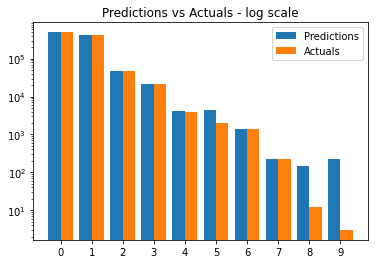

In [15]:
#function to vizualize our loss
def visualize_loss():
    
    '''Produces a log-scale visualization of the model predictions compared to the actual values'''
    
    plt.hist((y_pred,y_test),bins=np.arange(11)-0.5,log=True)
    plt.legend(labels=('Predictions','Actuals'))
    plt.xticks(range(10))
    plt.title('Predictions vs Actuals - log scale')
    plt.show()

visualize_loss()

The main problem areas are 5, 8, and 9. Referring back to the [dataset description](https://archive.ics.uci.edu/ml/datasets/Poker+Hand), that's Flush, Straight Flush, and Royal Straight Flush, respecticely. Let's add a feature to help determine whether a hand is a flush or not.

In [16]:
# adding feature that counts the number of different suits (a value of 1 means all cards have the same suit, i.e. flush)
X_train['flush'] = X_train.loc[:,['S1', 'S2', 'S3', 'S4', 'S5']].apply(lambda x: len(np.unique(x)), axis = 1)
X_test['flush'] = X_test.loc[:,['S1', 'S2', 'S3', 'S4', 'S5']].apply(lambda x: len(np.unique(x)), axis = 1)

In [17]:
# trying the Decision Tree model again
accuracy_pct = decision_tree(X_train, y_train, X_test, y_test)
print(f'The model is {accuracy_pct}% accurate')

The model is 99.345% accurate


Getting closer! What are the remaining issues?

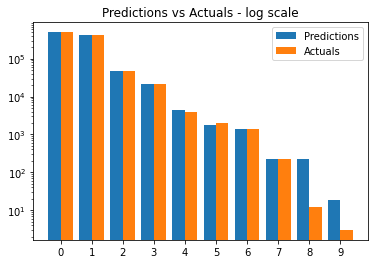

In [18]:
# visualizing
visualize_loss()

Three tricky areas right now are category 8, 9 and 4 - those are straights. I could imagine our model struggling with straights ranging from 10 to ace [10,11,12,13,1]. Let's exchange all 1s for 14 to get a more logical [10,11,12,13,14].

In [19]:
for rank in ['R1', 'R2', 'R3', 'R4', 'R5']:
    X_train.loc[X_train[rank] == 1,rank] = 14
    X_test.loc[X_test[rank] == 1,rank] = 14

Let's also create a feature to help distinguish a straight. A helpful feature could perhaps be the span between the highest and the lowest card. In a straight, e.g. [3, 4, 5, 6, 7], this span will always be 4.

In [20]:
X_train['span'] = X_train.loc[:,['R1', 'R2', 'R3', 'R4', 'R5']].apply(lambda x: max(x)-min(x), axis = 1)
X_test['span'] = X_test.loc[:,['R1', 'R2', 'R3', 'R4', 'R5']].apply(lambda x: max(x)-min(x), axis = 1)

In [21]:
# trying the Decision Tree model again
accuracy_pct = decision_tree(X_train, y_train, X_test, y_test)
print(f'The model is {accuracy_pct}% accurate')

The model is 99.9636% accurate


So close now! What are the remaining few issues?

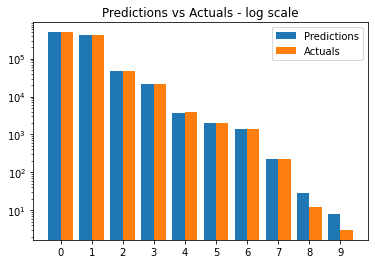

In [22]:
# visualizing
visualize_loss()

Looks like we're predicting too many 8's and 9's. Let's start with the 9's - Royal Straight Flush. A feature that should help us predict them is the sum of the card ranks. A Royal Straight Flush should always amount to 10+11+12+13+14 = 60

In [23]:
X_train['sum'] = X_train.loc[:,['R1', 'R2', 'R3', 'R4', 'R5']].apply(lambda x: sum(x), axis = 1)
X_test['sum'] = X_test.loc[:,['R1', 'R2', 'R3', 'R4', 'R5']].apply(lambda x: sum(x), axis = 1)

In [24]:
# trying the Decision Tree model again
accuracy_pct = decision_tree(X_train, y_train, X_test, y_test)
print(f'The model is {accuracy_pct}% accurate')

The model is 100.0% accurate


Sweet, we did it! Just look at this gorgeous image:

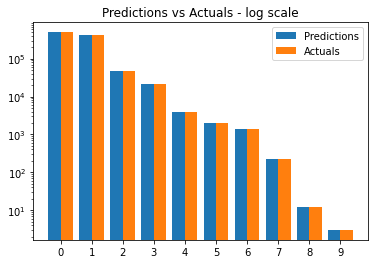

In [25]:
# victory lap visualization
visualize_loss()

And just for fun, let's see how the other models handle the new features:

In [26]:
try_many_models(X_train, y_train, X_test, y_test)

/opt/anaconda3/envs/general/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Model,Accuracy (%)
0,Logistic Regression,99.72
1,K-nearest neighbors,98.36
2,SVC,99.96
3,RBF Kernel SVM,99.58
4,Naive Bayes,99.72
5,Random Forest,99.87


# Comments
* Even though the Decision Tree model looked weak in the first comparison, it is now the only one to reach 100%. The original hypothesis holds true!
* A common way to gain insights about misclassified data is to look into not just which classes get misclassified most, but also which classes they are incorrectly assigned to. In this simple tutorial, however, we didn't need to. 
* The initial concern about the testing set being larger than the training set proved unwarranted. 25000 entries were enough to train a perfect model.
* Even though we reached 100% accuracy, there's definitely room for improvement. For instance, the first feature generation using pd.Series.value_counts.nlargest is pretty slow/inefficient (50-100x slower than the other feature generations). It could probably be rewritten to run faster.

# Other directions

There are definitely other strategies we could try here, for example:

* Sorting the cards in ascending order
* Changing the dataset structure completely:
  * Using 5 columns, one for each card, and using values between 0 and 51 (a deck of cards has 52 different cards). 
  * Using 52 one-hot-encoded columns - one for each possible card.
* Applying the raw data to a Neural Network instead of creating new features